# Mobile Price Classification

## Problem Statement

* Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

* He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

* Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

* In this problem you do not have to predict actual price but a price range indicating how high the price is

# Import Libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import pydotplus
from IPython.display import Image  

#### Dataset as 21 features and 2000 entries. The meanings of the features are given below.

* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Mega Byte
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not
* price_range: This is the target variable with value of 0(low medium  cost), 1(above medium cost)

# Read the Data

In [80]:
df =  pd.read_csv('mobile_price.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [81]:
df.shape

(2000, 21)

In [82]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [83]:
df.std().sort_values()

m_dep               0.288416
three_g             0.426273
four_g              0.499662
dual_sim            0.500035
wifi                0.500076
blue                0.500100
touch_screen        0.500116
price_range         0.500125
clock_speed         0.816004
n_cores             2.287837
sc_h                4.213245
fc                  4.341444
sc_w                4.356398
talk_time           5.463955
pc                  6.064315
int_memory         18.145715
mobile_wt          35.399655
px_width          432.199447
battery_power     439.418206
px_height         443.780811
ram              1084.732044
dtype: float64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [85]:
df.price_range.value_counts()

1    1000
0    1000
Name: price_range, dtype: int64

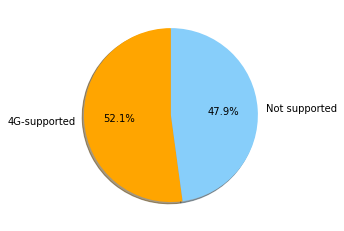

In [86]:
labels = ["4G-supported",'Not supported']
values = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

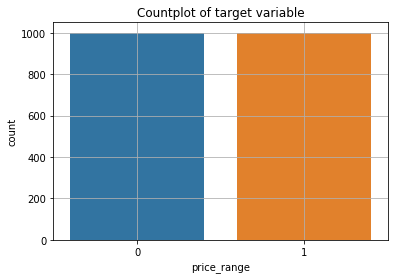

In [87]:
#Ploting  the distribution of the target variable.
sns.countplot(df['price_range'])
plt.title("Countplot of target variable")
plt.grid(True)
plt.show()

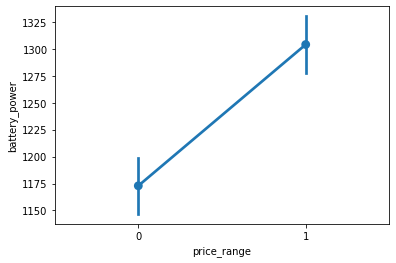

In [88]:
sns.pointplot(x='price_range',y='battery_power',data=df)

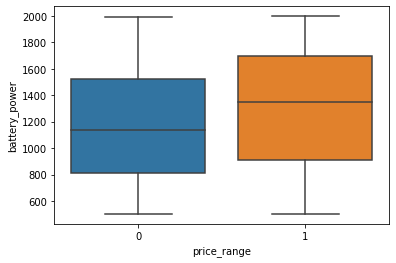

In [89]:
sns.boxplot(x='price_range',y='battery_power',data=df)


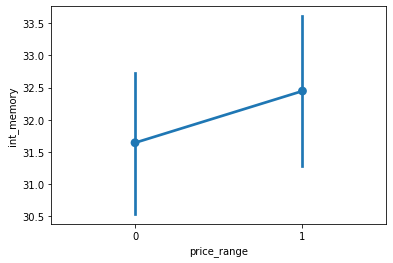

In [90]:
sns.pointplot(x='price_range',y='int_memory',data=df)


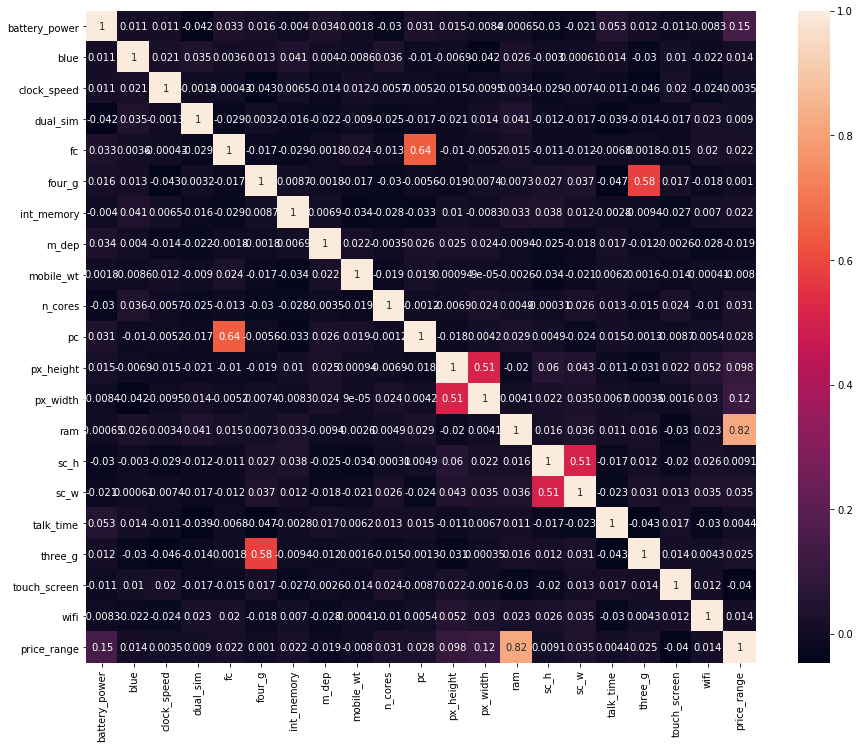

In [91]:
fig = plt.figure(figsize=(15,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot =True)

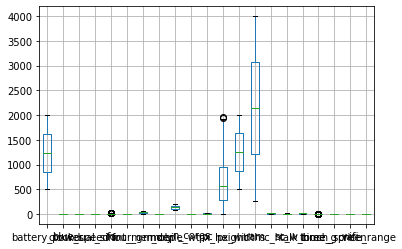

In [92]:
# Ploting a box plot to detect the outlair

df.boxplot()

In [93]:
# Outlair Detaction using IQR method
Q1 = df.drop(['price_range'], axis=1).quantile(0.25)

Q3 = df.drop(['price_range'], axis=1).quantile(0.75)


IQR = Q3 - Q1

print(IQR)

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

battery_power     763.50
blue                1.00
clock_speed         1.50
dual_sim            1.00
fc                  6.00
four_g              1.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
three_g             0.00
touch_screen        1.00
wifi                1.00
dtype: float64


In [94]:
df.shape

(1506, 21)

In [95]:
df.std()

battery_power     439.152661
blue                0.499972
clock_speed         0.813850
dual_sim            0.500138
fc                  4.215837
four_g              0.464831
int_memory         18.218391
m_dep               0.287849
mobile_wt          35.143590
n_cores             2.276619
pc                  6.059893
px_height         435.280087
px_width          428.973230
ram              1084.554839
sc_h                4.213579
sc_w                4.417835
talk_time           5.433910
three_g             0.000000
touch_screen        0.500130
wifi                0.500138
price_range         0.500122
dtype: float64

### Confusion matrix (heatmap)  roc-auc curve.


In [96]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Mobile Price ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)




In [97]:
from matplotlib.colors import ListedColormap
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

# Model creation


#### Standard Scalar for Naive_bayes and KNN.


In [98]:
df_target = df['price_range']
X = df.drop('price_range', axis = 1)

In [99]:
ss = StandardScaler()

num_scaled = ss.fit_transform(X)

In [100]:

X = pd.DataFrame(X, columns=X.columns)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_scaled, df_target, test_size=0.25, random_state=123,stratify=df_target)

print("Training size = " + str(X_train.shape[0]))
print("Testing size = " + str(X_test.shape[0]))

Training size = 1129
Testing size = 377


# Naive_bayes


In [102]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_test_pred1 = gnb.predict(X_test)
y_train_pred1=gnb.predict(X_train)

knn_acc=accuracy_score(y_test_pred1,y_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:93.09123117803367
Test Set Accuracy:94.42970822281167

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       189
           1       0.94      0.95      0.94       188

    accuracy                           0.94       377
   macro avg       0.94      0.94      0.94       377
weighted avg       0.94      0.94      0.94       377



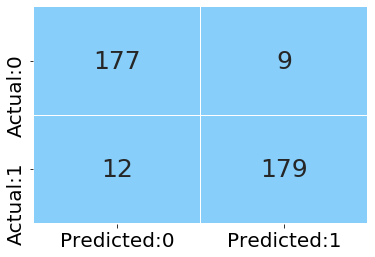

In [103]:
plot_confusion_matrix(gnb)

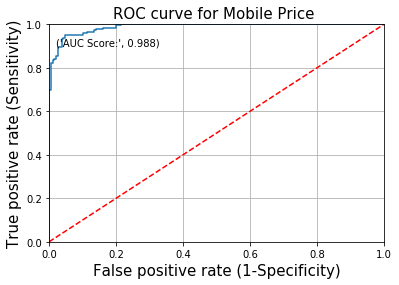

In [104]:
plot_roc(gnb)

In [105]:
gnb = gnb
score=cross_val_score(gnb, X_train, y_train, cv=10)
gnb_score=score.mean()
print("Accuracy after 10 fold cross validation:", gnb_score)

Accuracy after 10 fold cross validation: 0.9273625158027812


# KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=44)

knn.fit(X_train,y_train)

y_test_pred1 = knn.predict(X_test)
y_train_pred1=knn.predict(X_train)

knn_acc=accuracy_score(y_test_pred1,y_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:90.69973427812224
Test Set Accuracy:90.18567639257294

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       189
           1       0.90      0.91      0.90       188

    accuracy                           0.90       377
   macro avg       0.90      0.90      0.90       377
weighted avg       0.90      0.90      0.90       377



In [107]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 3, 
                        scoring = 'accuracy', 
                        n_jobs=-1)
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid)

Best parameters for KNN Classifier:  GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan',
                                    'Chebyshev'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
             scoring='accuracy')


In [108]:
knn_grid.best_params_


{'metric': 'manhattan', 'n_neighbors': 23}

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=23,metric= 'manhattan')

knn.fit(X_train,y_train)

y_test_pred1 = knn.predict(X_test)
y_train_pred1=knn.predict(X_train)

knn_acc=accuracy_score(y_test_pred1,y_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))

print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:91.05403011514615
Test Set Accuracy:91.77718832891246

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       193
           1       0.90      0.93      0.92       184

    accuracy                           0.92       377
   macro avg       0.92      0.92      0.92       377
weighted avg       0.92      0.92      0.92       377



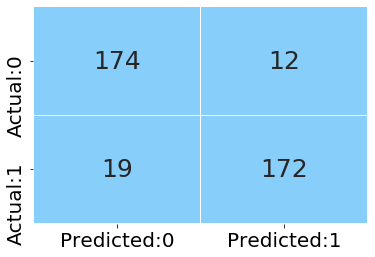

In [110]:
plot_confusion_matrix(knn)

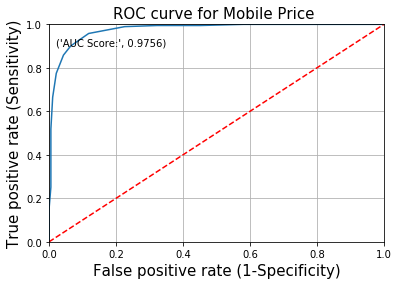

In [111]:
plot_roc(knn)

In [113]:
knn=KNeighborsClassifier(n_neighbors=23,metric= 'manhattan')
score=cross_val_score(knn, X_train, y_train, cv=10)
knn_score=score.mean()
print("Accuracy after 10 fold cross validation:", knn_score)

Accuracy after 10 fold cross validation: 0.8857537926675094


# LOGISTIC REGRESSION


In [114]:
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

lr_acc=accuracy_score(y_test_pred,y_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:98.93711248892826
Test Set Accuracy:97.87798408488064

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       184
           1       0.98      0.97      0.98       193

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



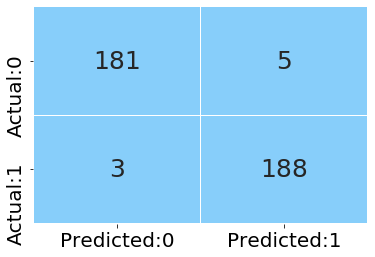

In [115]:
plot_confusion_matrix(lr)

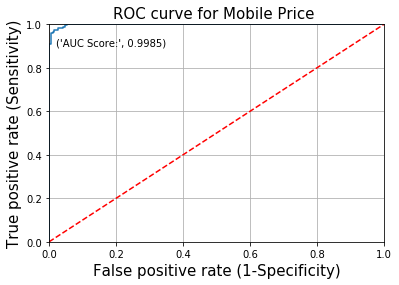

In [116]:
plot_roc(lr)

## Tuning Logestic parameters

In [168]:
tuned_paramaters =  {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }

lr_grid = GridSearchCV(estimator = lr, 
                        param_grid = tuned_paramaters, 
                        cv = 3, 
                        scoring = 'accuracy', 
                        n_jobs=-1)
lr_grid.fit(X_train, y_train)
print('Best parameters for Logestic Regression Classifier: ', lr_grid.best_params_)

Best parameters for Logestic Regression Classifier:  {'C': 1.623776739188721, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


# Post Logestic Regression Tuning

In [117]:
lr = LogisticRegression(penalty='l1',C=1.623776739188721,max_iter=1000,solver= 'saga')
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

lr_acc=accuracy_score(y_test_pred,y_test)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:99.82285208148805
Test Set Accuracy:97.87798408488064

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       182
           1       0.99      0.97      0.98       195

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



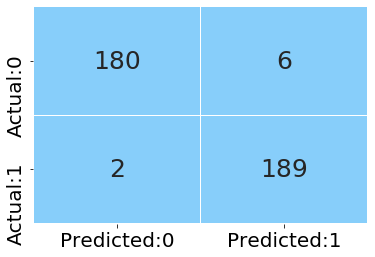

In [118]:
plot_confusion_matrix(lr)

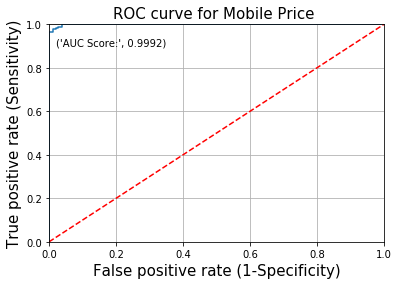

In [119]:
plot_roc(lr)

In [120]:
lr = LogisticRegression(penalty='l1',C=1.623776739188721,max_iter=1000,solver= 'saga')
score=cross_val_score(lr, X_train, y_train, cv=10)
lr_score=score.mean()
print("Accuracy after 10 fold cross validation:", lr_score)

Accuracy after 10 fold cross validation: 0.9920353982300885


## Using Unsclaed Data

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_target, test_size=0.25, random_state=123,stratify=df_target)

print("Training size = " + str(X_train.shape[0]))
print("Testing size = " + str(X_test.shape[0]))

Training size = 1129
Testing size = 377


# DECISION TREE


In [122]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_test_pred3 = dtc.predict(X_test)
y_train_pred3=dtc.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))

print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:93.89920424403184

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       189
           1       0.93      0.95      0.94       188

    accuracy                           0.94       377
   macro avg       0.94      0.94      0.94       377
weighted avg       0.94      0.94      0.94       377



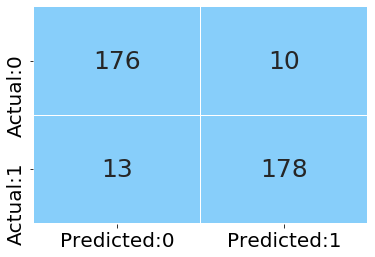

In [123]:
plot_confusion_matrix(dtc)

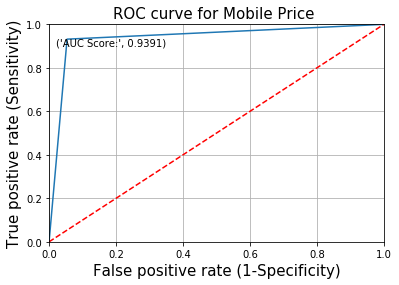

In [124]:
plot_roc(dtc)

In [125]:
import pydotplus
from IPython.display import Image
import graphviz

In [126]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

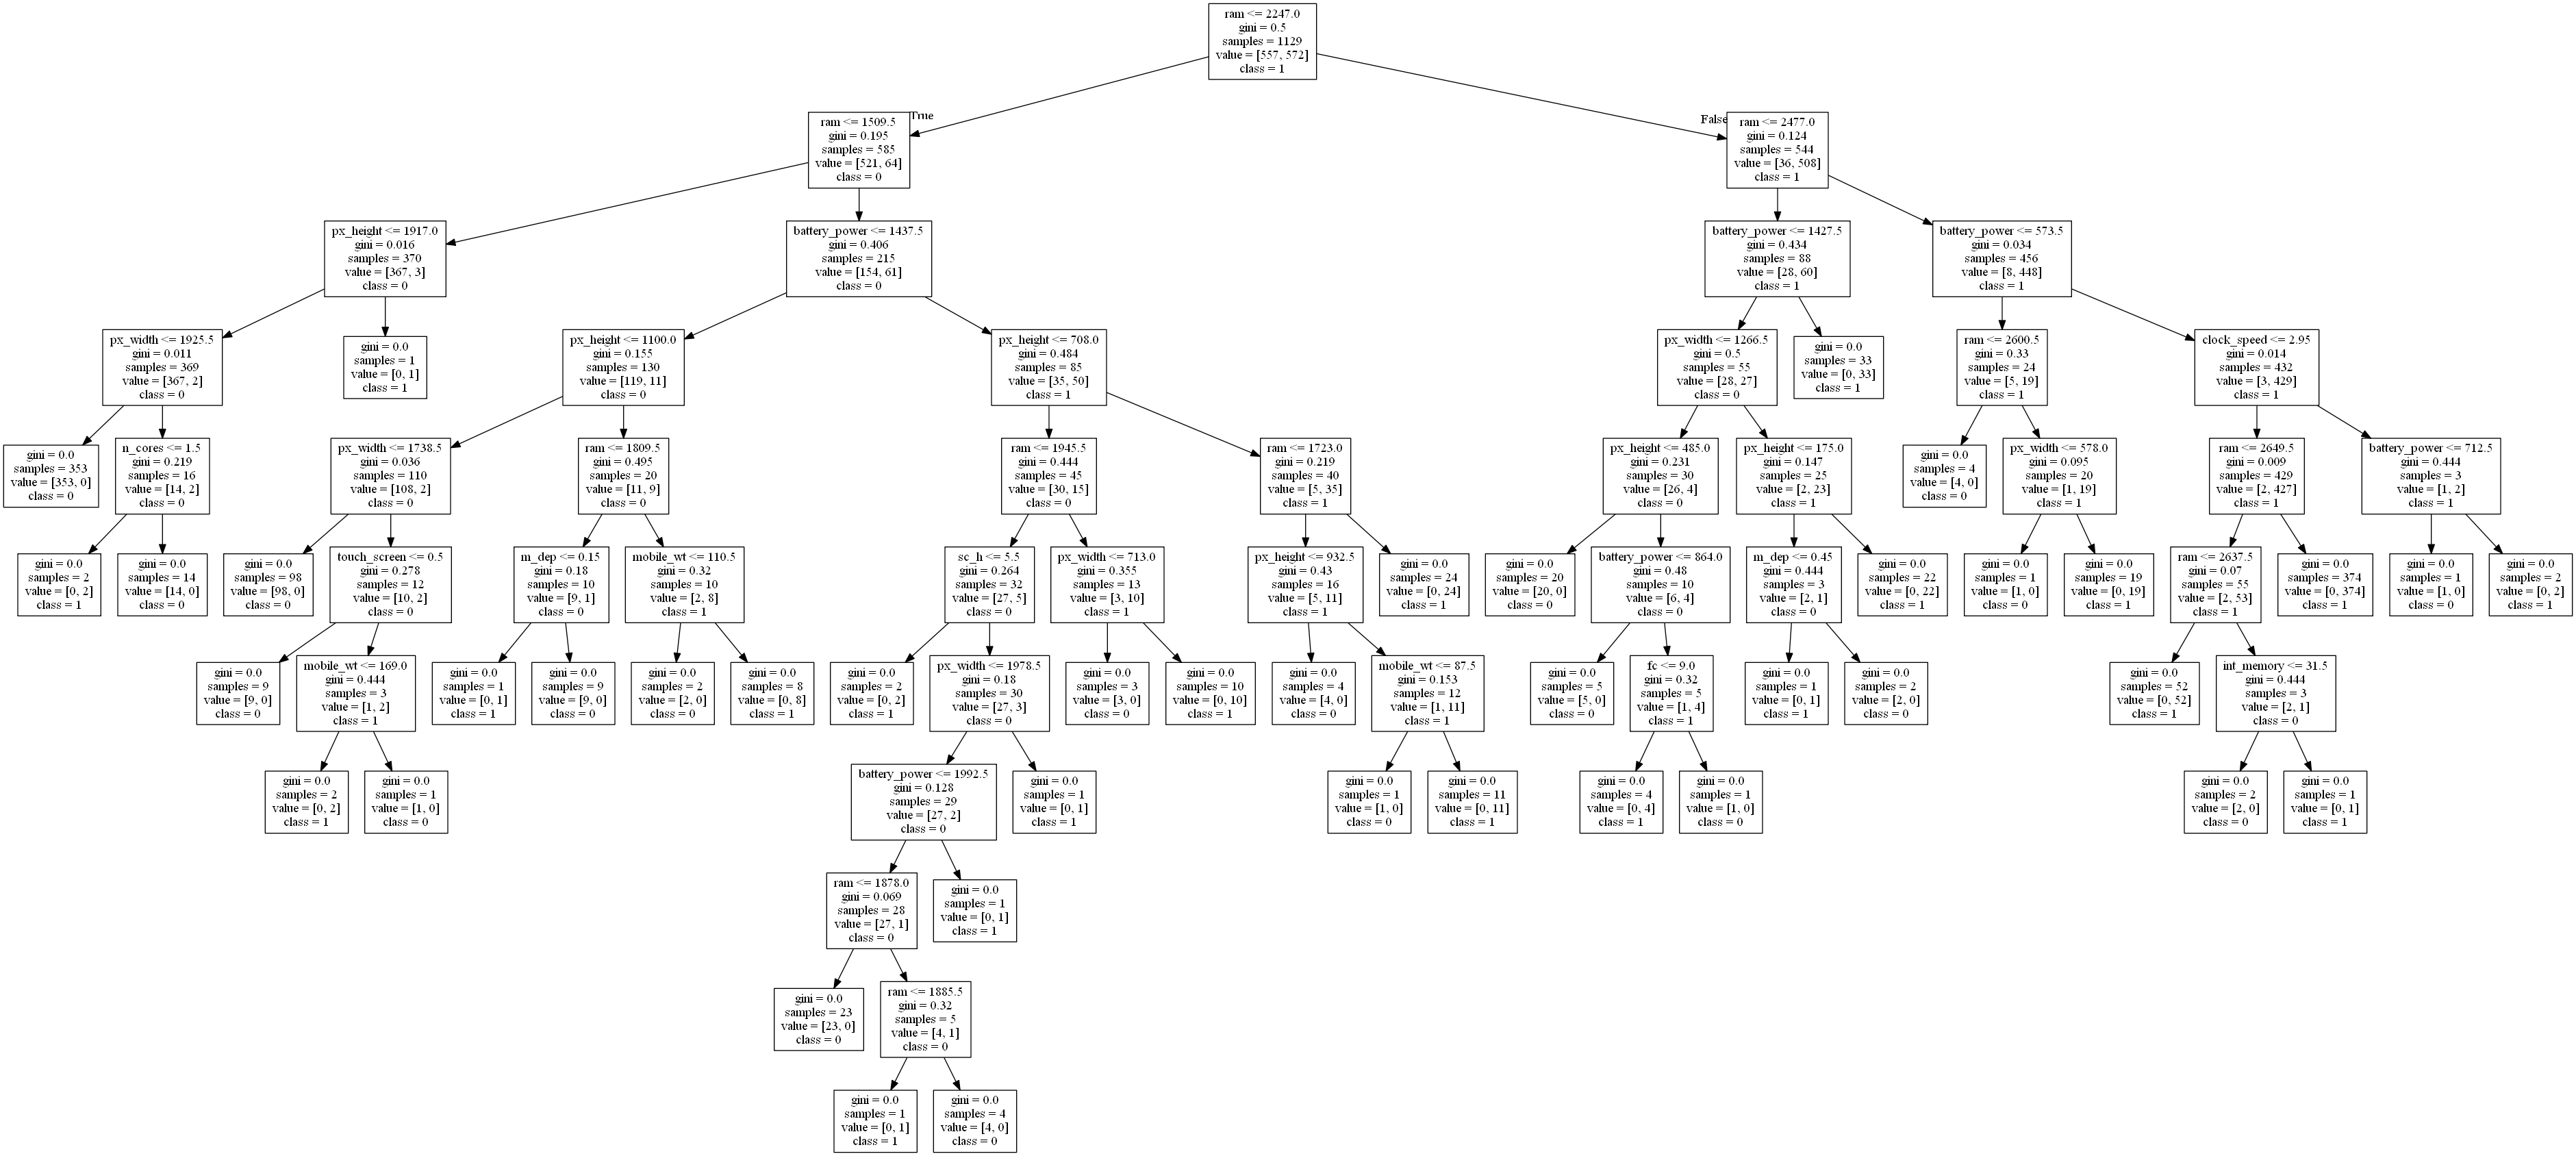

In [127]:
labels = X_train.columns


dot_data = tree.export_graphviz(dtc, feature_names = labels, class_names = ["0","1"])  

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

# Decision Treee Tuning 

In [182]:
from sklearn.model_selection import RandomizedSearchCV

In [183]:
tuned_paramaters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

In [184]:
DT_grid  = GridSearchCV(estimator=dtc, param_grid = tuned_paramaters,  scoring = 'accuracy',cv = 5, verbose = True)
DT_grid.fit(X_train,y_train)
print(DT_grid.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2}


In [128]:
dtc = DecisionTreeClassifier(criterion='entropy',
                       max_depth=20, max_features='sqrt',  min_samples_split=4)
dtc.fit(X_train, y_train)

y_test_pred3 = dtc.predict(X_test)
y_train_pred3=dtc.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:98.93711248892826
Test Set Accuracy:85.41114058355438

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       193
           1       0.84      0.87      0.85       184

    accuracy                           0.85       377
   macro avg       0.85      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377



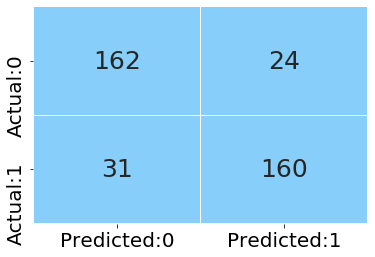

In [129]:
plot_confusion_matrix(dtc)

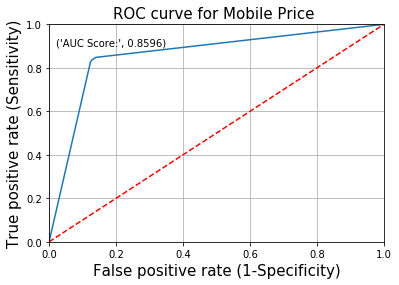

In [130]:
plot_roc(dtc)

In [131]:
dtc = DecisionTreeClassifier(criterion='entropy',
                       max_depth=20, max_features='sqrt',  min_samples_split=4)
score=cross_val_score(dtc, X_train, y_train, cv=10)
dtc_score=score.mean()
print("Accuracy after 10 fold cross validation:", dtc_score)

Accuracy after 10 fold cross validation: 0.8511298988621997


# Random Forest


In [132]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_test_pred3 = rf.predict(X_test)
y_train_pred3=rf.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:94.6949602122016

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       192
           1       0.93      0.96      0.95       185

    accuracy                           0.95       377
   macro avg       0.95      0.95      0.95       377
weighted avg       0.95      0.95      0.95       377



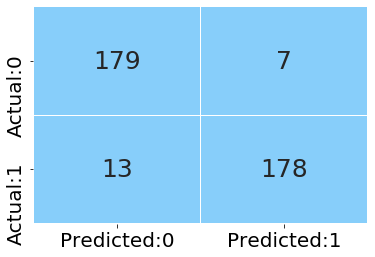

In [133]:
plot_confusion_matrix(rf)

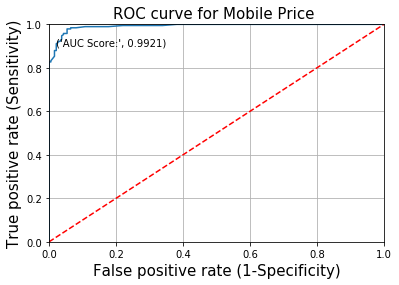

In [134]:
plot_roc(rf)

In [135]:
rf = RandomForestClassifier(random_state = 1)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

precision=cm[1,1]/(cm[1,1]+cm[0,1])
print(precision)
sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])

print(sensitivity)

0.9672131147540983
0.9267015706806283


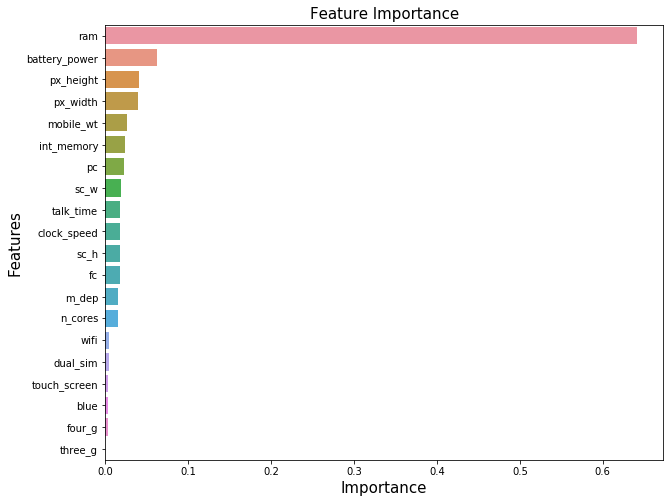

In [136]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})


important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(10,8))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

# Parameter Tunning 

In [69]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [70]:
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [71]:
DT_grid  = GridSearchCV(estimator=rf, param_grid = parameters,  scoring = 'accuracy',cv = 5, verbose = 0)
DT_grid.fit(X_train,y_train)
print(DT_grid.best_params_)

{'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 33}


In [137]:
# post tunning 

In [138]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap= False, max_depth= 4, max_features='auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 33)
rf.fit(X_train, y_train)

y_test_pred3 = rf.predict(X_test)
y_train_pred3=rf.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:96.36846767050487
Test Set Accuracy:94.42970822281167

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       195
           1       0.92      0.97      0.94       182

    accuracy                           0.94       377
   macro avg       0.94      0.95      0.94       377
weighted avg       0.95      0.94      0.94       377



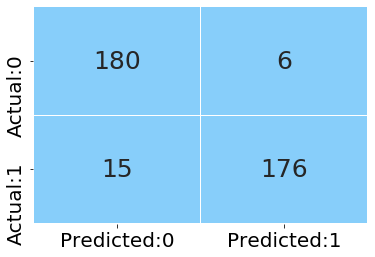

In [139]:
plot_confusion_matrix(rf)

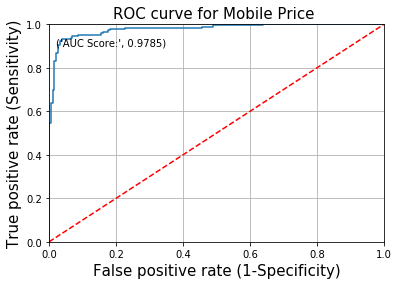

In [140]:
plot_roc(rf)

In [141]:
rf = RandomForestClassifier(bootstrap= False, max_depth= 4, max_features='auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 33)

score=cross_val_score(rf, X_train, y_train, cv=10)
rf_score=score.mean()
print("Accuracy after 10 fold cross validation:", rf_score)

Accuracy after 10 fold cross validation: 0.9167430467762326


In [142]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# AdaBoostClassifier

In [143]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)
y_test_pred4 = ada_model.predict(X_test)
y_train_pred4=ada_model.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred4,y_train)*100))

print("Test Set Accuracy:"+str(accuracy_score(y_test_pred4,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4,y_test))


Train Set Accuracy:99.91142604074402
Test Set Accuracy:97.87798408488064

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       190
           1       0.97      0.99      0.98       187

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



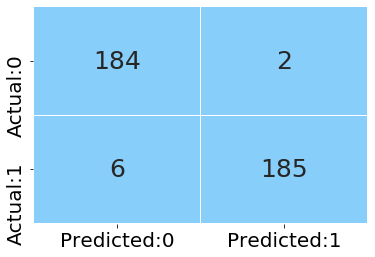

In [144]:
plot_confusion_matrix(ada_model)

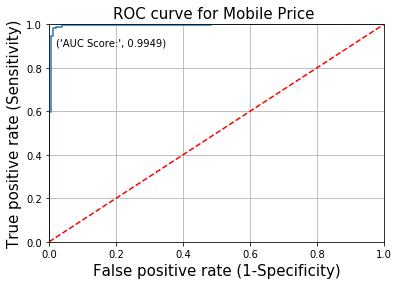

In [145]:
plot_roc(ada_model)

###  Adaboost Tuning 

In [80]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                     'n_estimators':range(1,51)}
ada_model =AdaBoostClassifier()
ada_grid = GridSearchCV(estimator = ada_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
ada_grid.fit(X_train, y_train)
print('Best parameters for ADABoost classifier: ', ada_grid.best_params_, '\n')

Best parameters for ADABoost classifier:  {'learning_rate': 1.0, 'n_estimators': 49} 



In [146]:
ada_model = AdaBoostClassifier(n_estimators = 49, random_state = 10,learning_rate= 1.0)
ada_model.fit(X_train, y_train)
y_test_pred4 = ada_model.predict(X_test)
y_train_pred4=ada_model.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred4,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred4,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4,y_test))


Train Set Accuracy:99.91142604074402
Test Set Accuracy:98.40848806366049

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       188
           1       0.98      0.99      0.98       189

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



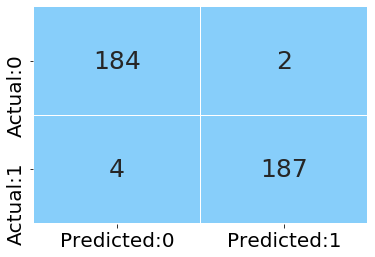

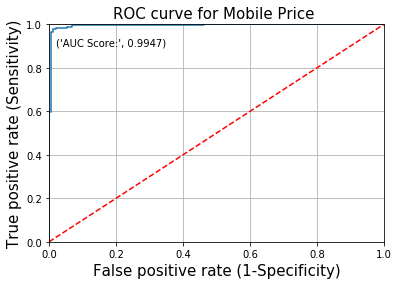

In [147]:
plot_confusion_matrix(ada_model)

plot_roc(ada_model)

In [148]:
ada_model = AdaBoostClassifier(n_estimators = 49, random_state = 10,learning_rate= 1.0)
score1=cross_val_score(ada_model, X_train, y_train, cv=10)
ada_score=score1.mean()
print("Accuracy after 10 fold cross validation:", ada_score)

Accuracy after 10 fold cross validation: 0.9698878002528446


# GradientBoostingClassifier

In [149]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)
y_test_pred5 = gboost_model.predict(X_test)
y_train_pred5=gboost_model.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred5,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred5,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred5,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:94.9602122015915

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       191
           1       0.94      0.96      0.95       186

    accuracy                           0.95       377
   macro avg       0.95      0.95      0.95       377
weighted avg       0.95      0.95      0.95       377



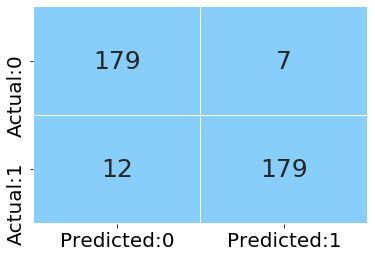

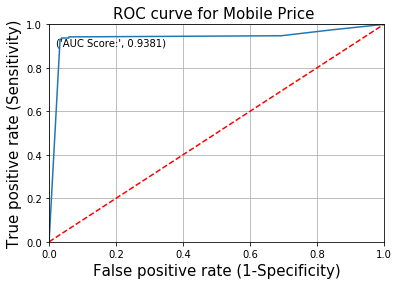

In [150]:


plot_confusion_matrix(gboost_model)
plot_roc(gboost_model)

### GrdientBoosting Tuning 

In [86]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                     'n_estimators':range(1,51),
                    'max_depth':range(1,11)}
gbc_model =GradientBoostingClassifier()
gbc_grid = GridSearchCV(estimator = gboost_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
gbc_grid.fit(X_train, y_train)
print('Best parameters for GradientBoost classifier: ', gbc_grid.best_params_, '\n')

Best parameters for GradientBoost classifier:  {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 43} 



In [151]:
gboost_model = GradientBoostingClassifier(n_estimators = 43, max_depth = 2, random_state = 10,learning_rate= 0.5)
gboost_model.fit(X_train, y_train)
y_test_pred5 = gboost_model.predict(X_test)
y_train_pred5=gboost_model.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred5,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred5,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred5,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:97.08222811671088

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       189
           1       0.96      0.98      0.97       188

    accuracy                           0.97       377
   macro avg       0.97      0.97      0.97       377
weighted avg       0.97      0.97      0.97       377



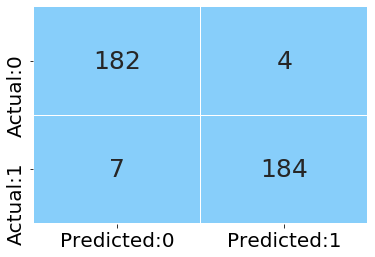

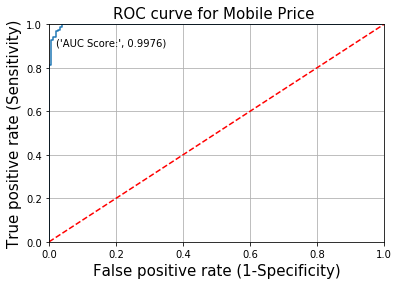

In [152]:
plot_confusion_matrix(gboost_model)

plot_roc(gboost_model)

In [154]:
gboost_model = GradientBoostingClassifier(n_estimators = 43, max_depth = 2, random_state = 10,learning_rate= 0.5)
score2=cross_val_score(gboost_model, X_train, y_train, cv=10)
gboost_score=score2.mean()
print("Accuracy after 10 fold cross validation:", gboost_score)

Accuracy after 10 fold cross validation: 0.9663558786346398


# XGBoost

In [155]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1,verbosity=0)
xgb_model.fit(X_train, y_train)
y_test_pred6 = xgb_model.predict(X_test)
y_train_pred6=xgb_model.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred6,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:97.34748010610079

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       190
           1       0.96      0.98      0.97       187

    accuracy                           0.97       377
   macro avg       0.97      0.97      0.97       377
weighted avg       0.97      0.97      0.97       377



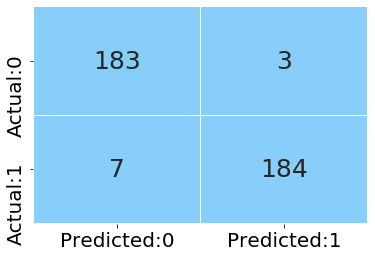

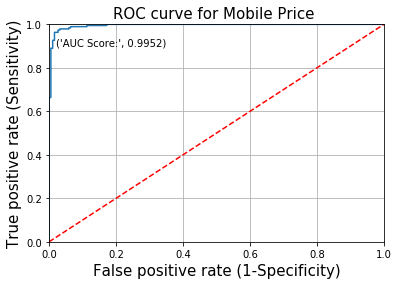

In [156]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1,verbosity=0)
xgb_model.fit(X_train, y_train)
plot_confusion_matrix(xgb_model)

plot_roc(xgb_model)

### XGB Tuning

In [ ]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                     'n_estimators':range(1,51),
                    'max_depth':range(1,11),
                    'gamma':range(1,100)}
xgb_model = XGBClassifier(verbosity=0)
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

In [157]:
xgb_model = XGBClassifier(max_depth = 2, gamma = 1,learning_rate= 0.6, n_estimators= 29)
xgb_model.fit(X_train, y_train)
y_test_pred6 = xgb_model.predict(X_test)
y_train_pred6=xgb_model.predict(X_train)
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred6,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6,y_test)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:97.08222811671088

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       191
           1       0.96      0.98      0.97       186

    accuracy                           0.97       377
   macro avg       0.97      0.97      0.97       377
weighted avg       0.97      0.97      0.97       377



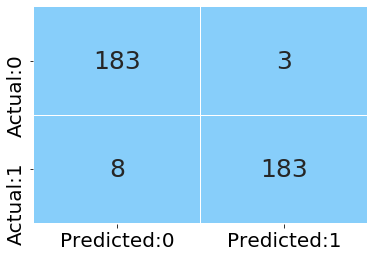

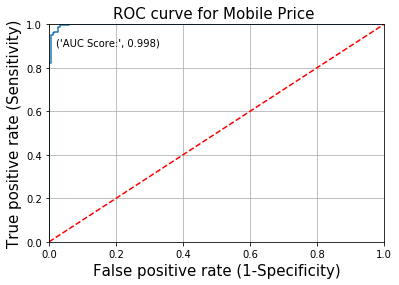

In [158]:

plot_confusion_matrix(xgb_model)

plot_roc(xgb_model)

In [159]:
xgb_model = XGBClassifier(max_depth = 2, gamma = 1,learning_rate= 0.6, n_estimators= 29)
score=cross_val_score(xgb_model, X_train, y_train, cv=10)
xgb_score=score.mean()
print("Accuracy after 10 fold cross validation:", xgb_score)

Accuracy after 10 fold cross validation: 0.9707806573957016


# Stacking

In [160]:
df_target = df['price_range']
X = df.drop('price_range', axis = 1)

In [161]:
ss = StandardScaler()

num_scaled = ss.fit_transform(X)

In [162]:
X = pd.DataFrame(X, columns=X.columns)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0


In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(num_scaled, df_target, test_size=0.25, random_state=123,stratify=df_target)

print("Training size = " + str(X_train.shape[0]))
print("Testing size = " + str(X_test.shape[0]))

Training size = 1129
Testing size = 377


In [164]:
from sklearn.ensemble import StackingClassifier

base_learners = [('rf_model', RandomForestClassifier(bootstrap= False, max_depth= 4, max_features='auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 33)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors=23,metric= 'manhattan')),
                 ('NB_model', GaussianNB()),
                ('lr_model',LogisticRegression(penalty='l1',C=1.623776739188721,max_iter=1000,solver= 'saga')),
                ('dt_model',DecisionTreeClassifier(criterion='entropy',
                       max_depth=20, max_features='sqrt',  min_samples_split=4)),
                ('xgb_model',XGBClassifier(max_depth = 2, gamma = 1,learning_rate= 0.6, n_estimators= 29,verbosity=0)),
                ('ada_model',AdaBoostClassifier(n_estimators = 49, random_state = 10,learning_rate= 1.0)),
                ('gbc_model',GradientBoostingClassifier(n_estimators = 43, max_depth = 2, random_state = 10,learning_rate= 0.5))]
stack_model = StackingClassifier(estimators = base_learners, final_estimator = XGBClassifier(max_depth = 2, gamma = 1,learning_rate= 0.6, n_estimators= 29))
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=4,
                                                       min_samples_leaf=2,
                                                       n_estimators=33)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=23)),
                               ('NB_model', GaussianNB()),
                               ('lr_model',
                                LogisticRegression(C=1.623776739188721,
                                                   max_iter=1000, penalty='l1',
                                                   solver='saga')),
                               ('dt_model',
                                DecisionTreeClass...
                                                 importanc

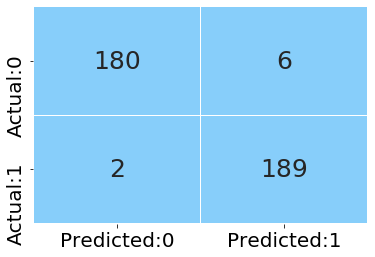

In [165]:
plot_confusion_matrix(stack_model)

In [166]:
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

In [167]:
test_report = get_test_report(stack_model)
# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       186
           1       0.97      0.99      0.98       191

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



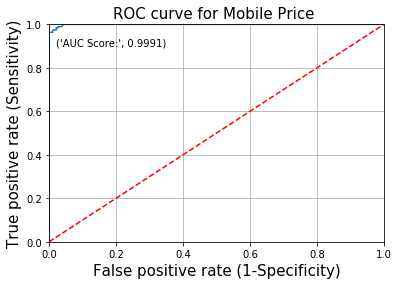

In [74]:
plot_roc(stack_model)

In [168]:
stack_model = StackingClassifier(estimators = base_learners, final_estimator = XGBClassifier(max_depth = 2, gamma = 1,learning_rate= 0.6, n_estimators= 29))

stack_score=cross_val_score(stack_model, X_train, y_train, cv=10)
stack_score=score.mean()
print("Accuracy after 10 fold cross validation:", stack_score)

Accuracy after 10 fold cross validation: 0.9707806573957016


## Best performing models


In [169]:
scores = [['Gaussian Naive Bayes', gnb_score],
          ['K-Nearest Neighbor', knn_score],
          ['Logistic Regression', lr_score],
          ['Decision Tree', dtc_score],
          ['Random Forest', rf_score],
         ['XGB Classifier',xgb_score],
         ['AdaBoost Classifier',ada_score],
         ['Gradient Boosting Classifier',gboost_score],
         ['StackingClassifier',stack_score]]
 

df_scores = pd.DataFrame(scores,
                         columns = ['Model', 'Score Average']
                        )
df_scores

,Model,Score Average
0,Gaussian Naive Bayes,0.927363
1,K-Nearest Neighbor,0.885754
2,Logistic Regression,0.992035
3,Decision Tree,0.851130
4,Random Forest,0.916743
5,XGB Classifier,0.970781
6,AdaBoost Classifier,0.969888
7,Gradient Boosting Classifier,0.966356
8,StackingClassifier,0.970781


# Conclusion 

* From The above analysis we conclude that Logistic and Stacking classifiers give the best models for predicting the price range for the customers so that they can chose the Mobile according to their budget.